In [1]:
#Cost Function and Gradient Descent for Simple Linear Regression

In [2]:
#For Made up Data

In [3]:
import numpy as np

def cost_function(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    m = len(y_true)
    cost = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return cost

true_values = [3, -0.5, 2, 7]
predicted_values = [2.5, 0.0, 2, 8]

cost = cost_function(true_values, predicted_values)
print(f"Cost: {cost}")


Cost: 0.1875


Iteration 0: Cost = 8.795733333333335
Iteration 100: Cost = 0.06824059411059318
Iteration 200: Cost = 0.061452233542846124
Iteration 300: Cost = 0.05689886427014314
Iteration 400: Cost = 0.053844294467658274
Iteration 500: Cost = 0.05179517520682299
Iteration 600: Cost = 0.05042054964033224
Iteration 700: Cost = 0.049498399580955185
Iteration 800: Cost = 0.048879786954551
Iteration 900: Cost = 0.04846479855038039
Optimized Weights:
Intercept (b): 0.0714933227260582
Slope (m): 1.6897558011750273
Final Cost Function Value: 0.04818867845943237


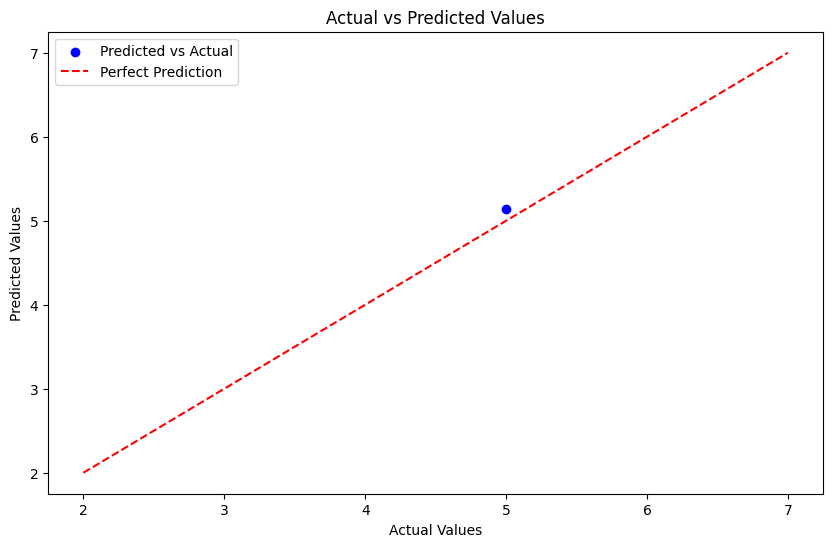

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = {
    'x': [1, 2, 3, 4],
    'y': [2, 3, 5, 7]
}
df = pd.DataFrame(data)

X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

weights = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 1000

def cost_function(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, weights, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(weights) - y)
        weights -= alpha * gradient
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return weights, cost_history

weights_optimal, cost_history = gradient_descent(X_train, y_train, weights, alpha, iterations)

y_pred = X_test.dot(weights_optimal)

print("Optimized Weights:")
print(f"Intercept (b): {weights_optimal[0][0]}")
print(f"Slope (m): {weights_optimal[1][0]}")

final_cost = cost_history[-1]
print(f"Final Cost Function Value: {final_cost}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [5]:
#For Real Dataset

Iteration 0: Cost = 1405519856.622921
Iteration 100: Cost = 60015330.8875577
Iteration 200: Cost = 46074595.44071233
Iteration 300: Cost = 36767665.60250199
Iteration 400: Cost = 30554295.91740613
Iteration 500: Cost = 26406208.039364137
Iteration 600: Cost = 23636916.348056413
Iteration 700: Cost = 21788118.37245374
Iteration 800: Cost = 20553848.264569815
Iteration 900: Cost = 19729841.14247242
Iteration 1000: Cost = 19179728.381148826
Iteration 1100: Cost = 18812469.35867727
Iteration 1200: Cost = 18567284.736415043
Iteration 1300: Cost = 18403597.814336706
Iteration 1400: Cost = 18294319.31141809
Iteration 1500: Cost = 18221364.2393298
Iteration 1600: Cost = 18172658.93681144
Iteration 1700: Cost = 18140142.945455335
Iteration 1800: Cost = 18118435.048384562
Iteration 1900: Cost = 18103942.70859781
Iteration 2000: Cost = 18094267.523949124
Iteration 2100: Cost = 18087808.304846905
Iteration 2200: Cost = 18083496.08622522
Iteration 2300: Cost = 18080617.219732694
Iteration 2400: Cos

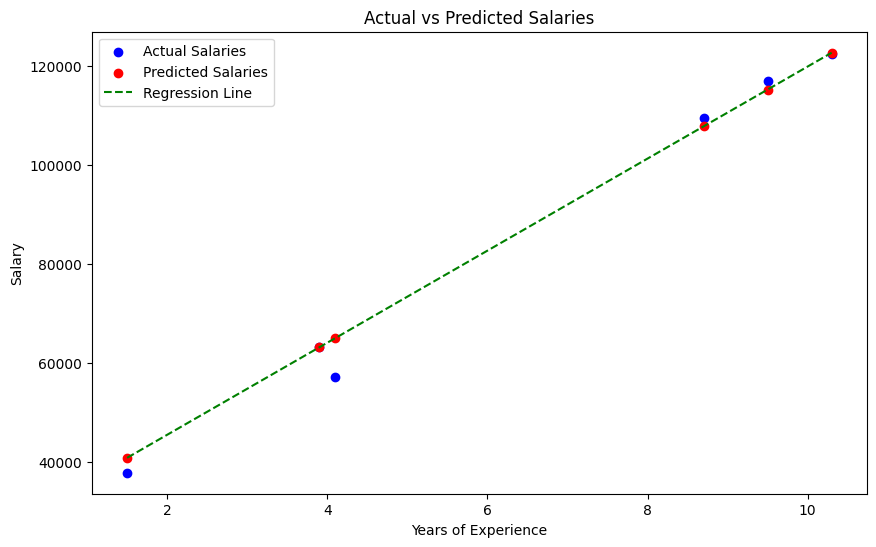

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('salary_data.csv')

X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

weights = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 10000

def cost_function(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, weights, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(weights) - y)
        weights -= alpha * gradient
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return weights, cost_history

weights_optimal, cost_history = gradient_descent(X_train, y_train, weights, alpha, iterations)

y_pred = X_test.dot(weights_optimal)

print("Optimized Weights:")
print(f"Intercept (b): {weights_optimal[0][0]}")
print(f"Slope (m): {weights_optimal[1][0]}")

final_cost = cost_history[-1]
print(f"Final Cost Function Value: {final_cost}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual Salaries')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted Salaries')
plt.plot([X_test[:, 1].min(), X_test[:, 1].max()], 
         [X_test.dot(weights_optimal).min(), X_test.dot(weights_optimal).max()], 
         color='green', linestyle='--', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salaries')
plt.legend()
plt.show()


In [10]:
# Cost Function and Gradient Descent for Multi Linear Regression

In [11]:
#For Made up Data

In [12]:
import numpy as np
import pandas as pd

data = {
    'Feature1': [1, 1, 2, 2],
    'Feature2': [1, 2, 2, 3],
    'Target': [2, 3, 5, 7]
}
df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']].values
y = df['Target'].values.reshape(-1, 1)

X = np.c_[np.ones((X.shape[0], 1)), X] 

def cost_function(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

weights = np.zeros((X.shape[1], 1))  


cost = cost_function(X, y, weights)
print(f"Cost Function Value: {cost}")


Cost Function Value: 10.875


Iteration 0: Cost = 8.893870370370369
Iteration 100: Cost = 0.31395774934982484
Iteration 200: Cost = 0.2662989658846745
Iteration 300: Cost = 0.22736534380912993
Iteration 400: Cost = 0.1953932833248398
Iteration 500: Cost = 0.16899177541404733
Iteration 600: Cost = 0.1470615284895514
Iteration 700: Cost = 0.1287326291731304
Iteration 800: Cost = 0.11331561806688852
Iteration 900: Cost = 0.10026308634696804
Optimized Weights:
Intercept (b): -0.9026138327313775
Slope (m): [[1.47752381]
 [1.50838005]]
Final Cost Function Value: 0.089242414719647


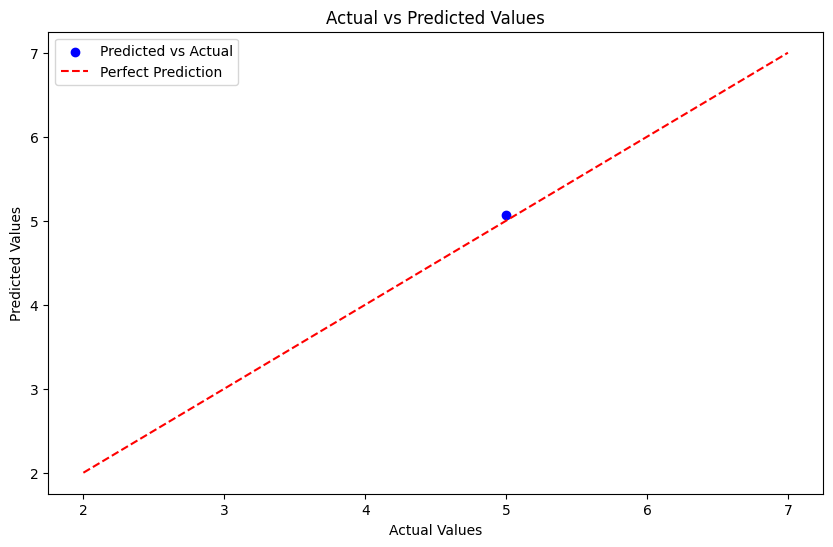

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = {
    'Feature1': [1, 1, 2, 2],
    'Feature2': [1, 2, 2, 3],
    'Target': [2, 3, 5, 7]
}
df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']].values
y = df['Target'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

weights = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 1000

def cost_function(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, weights, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(weights) - y)
        weights -= alpha * gradient
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return weights, cost_history

weights_optimal, cost_history = gradient_descent(X_train, y_train, weights, alpha, iterations)

y_pred = X_test.dot(weights_optimal)

print("Optimized Weights:")
print(f"Intercept (b): {weights_optimal[0][0]}")
print(f"Slope (m): {weights_optimal[1:]}")

final_cost = cost_history[-1]
print(f"Final Cost Function Value: {final_cost}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


Iteration 0: Cost = 798.208518046949
Iteration 100: Cost = 137.60362553227785
Iteration 200: Cost = 54.089907238443416
Iteration 300: Cost = 42.79559636622375
Iteration 400: Cost = 41.17442290824691
Iteration 500: Cost = 40.88973255315789
Iteration 600: Cost = 40.80631251855632
Iteration 700: Cost = 40.76288996045307
Iteration 800: Cost = 40.733477842178196
Iteration 900: Cost = 40.71208664782313
Optimized Weights:
Intercept (b): 38.05080475082555
Slope (m): [[-0.5107312 ]
 [ 1.33453878]
 [-2.99078897]
 [-5.0736654 ]
 [ 3.31855727]
 [ 2.93442178]
 [ 0.30124806]]
Final Cost Function Value: 40.696395195521845


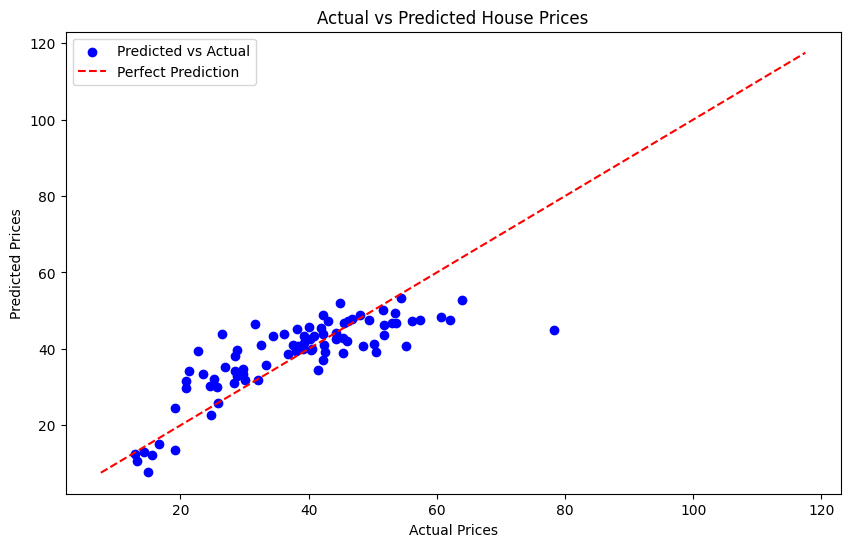

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

df = pd.read_csv('Real-estate.csv')

X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area'].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

weights = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 1000

def cost_function(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, weights, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(weights) - y)
        weights -= alpha * gradient
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return weights, cost_history

weights_optimal, cost_history = gradient_descent(X_train, y_train, weights, alpha, iterations)

y_pred = X_test.dot(weights_optimal)

print("Optimized Weights:")
print(f"Intercept (b): {weights_optimal[0][0]}")
print(f"Slope (m): {weights_optimal[1:]}")


final_cost = cost_history[-1]
print(f"Final Cost Function Value: {final_cost}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()
